# TP 01

El dataset fue extraído del siguiente link: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

In [1]:
import pandas as pd

dataset = pd.read_csv("./datos/heart_cleveland_upload.csv")

### Problema de Clasificación:
El problema que tenemos con este dataset es saber si la persona en cuestión tiene o no una enfermedad cardíaca. Esto es de clasificación binaria ya que puede ser 0 (no tiene) o 1 (tiene).

### Descripción y Exploración del Dataset

El dataset contiene 13 atributos, algunos numéricos y otros categóricos, como la edad y el género, entre otras y el target, es decir, el resultado: si tiene o no esta persona una enfermedad. A continuación la exploración para ver que columnas tenemos.

In [10]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Podemos ver las 13 columnas con los distintos tipos de datos

### Primer Modelo: Regresión Logística para Clasificación (Atributos Numéricos Continuos)

Primero importamos lo necesitado para splitear el dataset, armar el modelo y evaluarlo. Establecemos cuales son las columnas numéricas y las definimos como X. Y es el target, condition en el dataset. Spliteamos en x train, y train, x test e y test el dataset. Hacemos el modelo de logistic regression y lo usamos en el train. Predecimos el test. Vemos accuracy, precision, recall y matriz de confusión.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

columnas_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X = dataset[columnas_numericas]
Y = dataset['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

modelo01 = LogisticRegression()
modelo01.fit(X_train, Y_train)
pred01 = modelo01.predict(X_test)

accuracy01 = accuracy_score(Y_test, pred01)
precision01 = precision_score(Y_test, pred01, pos_label=1)
recall01 = recall_score(Y_test, pred01, pos_label=1)
matriz01 = confusion_matrix(Y_test, pred01)

print(f"Accuracy:  {accuracy01:.4f}")
print(f"Precision: {precision01:.4f}")
print(f"Recall:    {recall01:.4f}")
print("Matriz:")
print(matriz01)

Accuracy:  0.7000
Precision: 0.6829
Recall:    0.6667
Matriz:
[[35 13]
 [14 28]]


### Segundo Modelo: Árbol de Decisión (Atributos Numéricos Continuos)

Primero importamos lo necesitado para splitear el dataset, armar el modelo y evaluarlo. Establecemos cuales son las columnas numéricas y las definimos como X. Y es el target, condition en el dataset. Spliteamos en x train, y train, x test e y test el dataset. Buscamos el mejor depth (nos va a servir para el modelo, pero también para poder graficar después). Hacemos el árbol con la max depth que encontramos antes como la mejor o más óptima y lo usamos en el train. Predecimos el test. Vemos accuracy, precision, recall, matriz de confusión y la curva de la accuracy para train y test en función de la profundidad del árbol.

Accuracy:  0.7111
Precision: 0.6905
Recall:    0.6905
Matriz:
[[35 13]
 [13 29]]


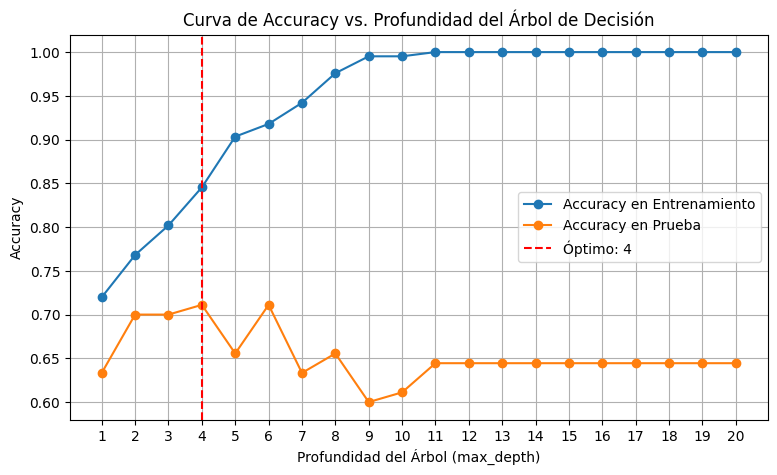


La mejor depth encontrada es: 4


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

columnas_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X = dataset[columnas_numericas]
Y = dataset['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

depths = np.arange(1,21)
train_accuracy = []
test_accuracy = []
mejor_accuracy = 0
mejor_depth = 0

for depth in depths:
    modelo_busqueda = DecisionTreeClassifier(max_depth=depth, random_state=42)
    modelo_busqueda.fit(X_train, Y_train)

    pred_busqueda_test = modelo_busqueda.predict(X_test)
    nuevo_accuracy = accuracy_score(Y_test, pred_busqueda_test)
    test_accuracy.append(nuevo_accuracy)

    if nuevo_accuracy > mejor_accuracy:
        mejor_accuracy = nuevo_accuracy
        mejor_depth = depth
    
    pred_busqueda_train = modelo_busqueda.predict(X_train)
    train_accuracy.append(accuracy_score(Y_train, pred_busqueda_train))

modelo02 = DecisionTreeClassifier(max_depth=mejor_depth, random_state=42)
modelo02.fit(X_train, Y_train)
pred02 = modelo02.predict(X_test)

accuracy02 = accuracy_score(Y_test, pred02)
precision02 = precision_score(Y_test, pred02, pos_label=1)
recall02 = recall_score(Y_test, pred02, pos_label=1)
matriz02 = confusion_matrix(Y_test, pred02)

print(f"Accuracy:  {accuracy02:.4f}")
print(f"Precision: {precision02:.4f}")
print(f"Recall:    {recall02:.4f}")
print("Matriz:")
print(matriz02)
plt.figure(figsize=(9, 5))
plt.plot(depths, train_accuracy, label='Accuracy en Entrenamiento', marker='o')
plt.plot(depths, test_accuracy, label='Accuracy en Prueba', marker='o')
plt.axvline(x=mejor_depth, color='r', linestyle='--', label=f'Óptimo: {mejor_depth}')
plt.title('Curva de Accuracy vs. Profundidad del Árbol de Decisión')
plt.xlabel('Profundidad del Árbol (max_depth)')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()
print(f"\nLa mejor depth encontrada es: {mejor_depth}")

### Tercer Modelo: Regresión Logística para Clasificación (Todos los Atributos)

Primero importamos lo necesitado para splitear el dataset, armar el modelo y evaluarlo. Usamos one hot encoding para poder usar los atributos que no sean numéricos continuos. Establecemos X e Y. Spliteamos en x train, y train, x test e y test el dataset. Hacemos el modelo de logistic regression y lo usamos en el train. Predecimos el test. Vemos accuracy, precision, recall y matriz de confusión.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

dataset_encoded = pd.get_dummies(dataset, columns=["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"], dtype=int)

X = dataset_encoded.drop(columns=['condition'])
Y = dataset_encoded['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

modelo03 = LogisticRegression(max_iter=2000)
modelo03.fit(X_train, Y_train)
pred03 = modelo03.predict(X_test)

accuracy03 = accuracy_score(Y_test, pred03)
precision03 = precision_score(Y_test, pred03, pos_label=1)
recall03 = recall_score(Y_test, pred03, pos_label=1)
matriz03 = confusion_matrix(Y_test, pred03)

print(f"Accuracy:  {accuracy03:.4f}")
print(f"Precision: {precision03:.4f}")
print(f"Recall:    {recall03:.4f}")
print("Matriz:")
print(matriz03)

Accuracy:  0.8333
Precision: 0.7872
Recall:    0.8810
Matriz:
[[38 10]
 [ 5 37]]


### Cuarto Modelo: Árbol de Decisión (Todos los Atributos)

Primero importamos lo necesitado para splitear el dataset, buscar hiperparametros, armar el modelo y evaluarlo. Usamos one hot encoding para poder usar los atributos que no sean numéricos continuos. Establecemos X e Y. Spliteamos en x train, y train, x test e y test el dataset. Hacemos el grid search para buscar mejores hiperparámetros (max depth, min samples split, criterion). Hacemos el árbol con estos parametros y lo usamos en el train. Vemos accuracy, precision, recall y matriz de confusión.

(Aclaro por las dudas, no entendí si en este árbol también había que poner el gráfico, pero no se como hacerlo porque el grid search no guarda los parametros (creo), sino sólo los mejores)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

dataset_encoded = pd.get_dummies(dataset, columns=["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"], dtype=int)

X = dataset_encoded.drop(columns=['condition'])
Y = dataset_encoded['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'min_samples_split': [2,5,10,15,20],
    'criterion': ['gini','entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=32),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, Y_train)

mejor_score = grid_search.best_score_
mejores_parametros = grid_search.best_params_
arbol_optimo = grid_search.best_estimator_

print(f"Mejor Accuracy en Grid Search: {mejor_score:.4f}")
print(f"Mejores Parametros en Grid Search: {mejores_parametros}")

pred04 = arbol_optimo.predict(X_test)

accuracy04 = accuracy_score(Y_test, pred04)
precision04 = precision_score(Y_test, pred04, pos_label=1)
recall04 = recall_score(Y_test, pred04, pos_label=1)
matriz04 = confusion_matrix(Y_test, pred04)

print(f"Accuracy:  {accuracy04:.4f}")
print(f"Precision: {precision04:.4f}")
print(f"Recall:    {recall04:.4f}")
print("Matriz:")
print(matriz04)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Mejor Accuracy en Grid Search: 0.7583
Mejores Parametros en Grid Search: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5}
Accuracy:  0.7111
Precision: 0.6739
Recall:    0.7381
Matriz:
[[33 15]
 [11 31]]
